In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Replace 'your_dataset.csv' with your dataset file path
data = pd.read_excel('/content/CG_ML_Data.xlsx')
data
data = data.replace('\xa0', ' ', regex=True)


In [ ]:
# Replace 'column_name' with the name of your column
unique_values = data['Object Name'].unique()

# Print the unique values
print("Unique values in 'Object Name':")
print(unique_values)
print(len(unique_values))

Unique values in 'Object Name':
['Sofa' 'Coffee Table' 'TV' 'Camera' 'Plate of Fruits' 'Dish on the Table'
 'Ketchup' 'Wall Lamp' 'Flower Plant' 'Toy Car' 'Water Bottle' 'Chair'
 'Printer']
13


In [ ]:
# Replace 'column_name' with the name of your column
i = data['Detected'].value_counts()
i

,count
Detected,
1,149
0,115


In [ ]:
column_to_encode = 'Object Name'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the selected column
data[column_to_encode] = label_encoder.fit_transform(data[column_to_encode])
data

,X-Coordinate,Y-Coordinate,Z-Coordinate,Object Name,Visual Angle,Time Taken,Detected
0,-3.680000,1.46,-4.940000,8,28.40415,0.646103,1
1,-3.680000,1.46,-4.940000,2,22.40948,3.674177,1
2,-0.738221,1.46,-3.955398,9,15.05543,5.587020,1
3,-0.738221,1.46,-3.955398,0,34.60249,8.996854,1
4,-0.738221,1.46,-3.955398,6,28.66863,10.264620,1
...,...,...,...,...,...,...,...
259,3.773359,1.46,2.860163,6,0.00000,30.000000,0
260,3.773359,1.46,2.860163,12,0.00000,30.000000,0
261,3.773359,1.46,2.860163,7,0.00000,30.000000,0
262,3.773359,1.46,2.860163,3,0.00000,30.000000,0


In [ ]:
from sklearn.decomposition import PCA

# Separate features and labels
# Replace 'target' with the name of your label column
X = data.drop(columns=['Detected'])  # Features
y = data['Detected']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
X_train.shape

(184, 6)

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Initialize SMOTE and apply it to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_train))


Class distribution before SMOTE: Counter({1: 106, 0: 78})
Class distribution after SMOTE: Counter({0: 106, 1: 106})


In [ ]:
X_train.shape

(212, 6)

Accuracy: 0.94
precision: 1.00
recall: 0.88
f1 score: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       1.00      0.88      0.94        43

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
[[37  0]
 [ 5 38]]


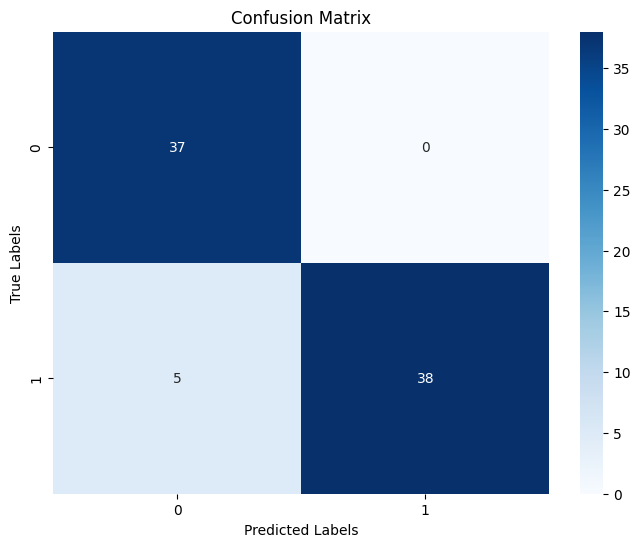

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled data
rf_model.fit(X_train_scaled, y_train)


# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"f1 score: {f1:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.96
Precision: 1.00
Recall: 0.93
F1 Score: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.93      0.96        43

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Confusion Matrix:
[[37  0]
 [ 3 40]]


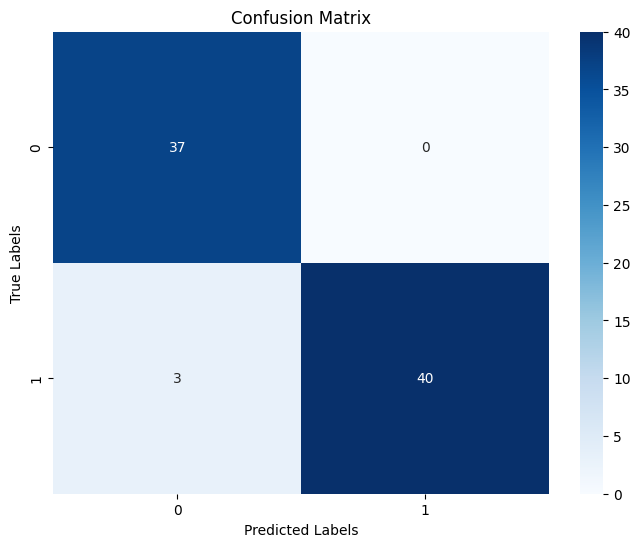

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.95
Precision: 1.00
Recall: 0.91
F1 Score: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.91      0.95        43

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

Confusion Matrix:
[[37  0]
 [ 4 39]]


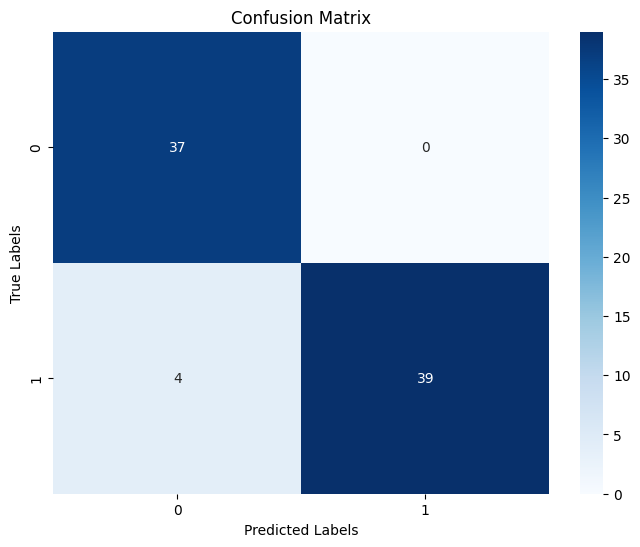

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)
logreg_model = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')  # C is the regularization strength
logreg_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


Accuracy: 0.94
Precision: 1.00
Recall: 0.88
F1 Score: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       1.00      0.88      0.94        43

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
[[37  0]
 [ 5 38]]


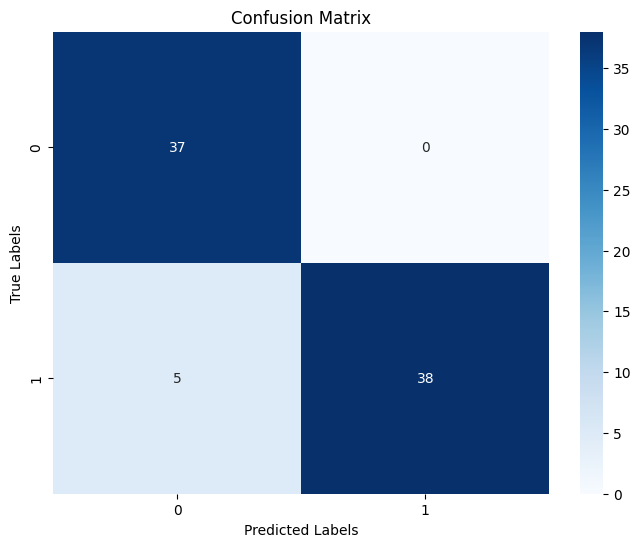

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(iterations=50, learning_rate=0.01, depth=6, random_state=42, verbose=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled data
catboost_model.fit(X_train_scaled, y_train)


# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=catboost_model.classes_, yticklabels=catboost_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[37  0]
 [ 0 43]]


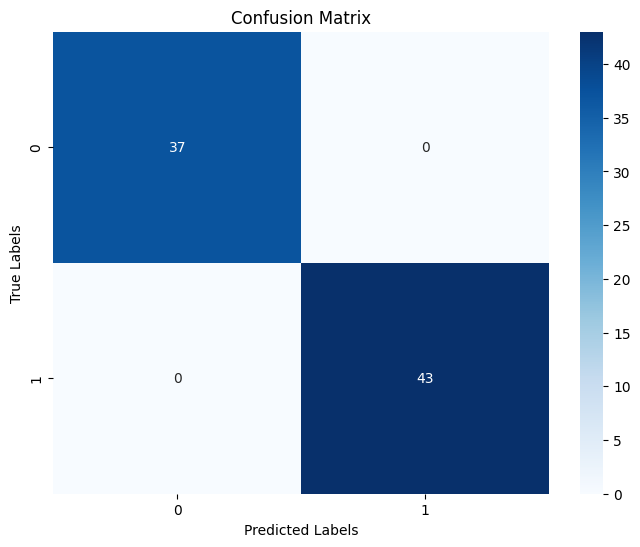

In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred = mlp_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(X_train.shape)

(212, 5)


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       1.00      0.88      0.94        43

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
[[37  0]
 [ 5 38]]


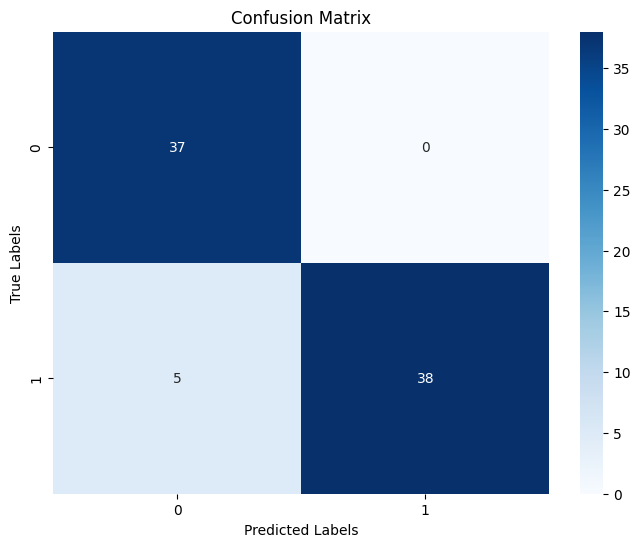

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC  # SVC for Support Vector Classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Initialize the Support Vector Machine model
svm_model = SVC(kernel='linear', C=0.001, random_state=42)  # Try smaller values like 0.1 or 0.01
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled data
svm_model.fit(X_train_scaled, y_train)
# Train the model

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pip install pandas numpy scikit-learn joblib

In [ ]:
import joblib
joblib.dump(logreg_model, "/content/lr.pkl")


['/content/lr.pkl']

In [ ]:
pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.2 which is incompatible.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 

In [ ]:
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Define input type
initial_type = [('float_input', FloatTensorType([None, 5]))]
onnx_model = convert_sklearn(mlp_model, initial_types=initial_type)

# Save ONNX model
with open("player_detection_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


In [ ]:
import onnx
from onnx import helper

# Load the ONNX model
model_path = "player_detection_model.onnx"
model = onnx.load(model_path)

# Remove the 'ZipMap' node
new_nodes = [node for node in model.graph.node if node.op_type != "ZipMap"]
model.graph.ClearField("node")
model.graph.node.extend(new_nodes)

# Save the modified model
new_model_path = "modified_player_detection_model.onnx"
onnx.save(model, new_model_path)
print(f"Modified model saved as {new_model_path}")


Modified model saved as modified_player_detection_model.onnx


In [ ]:
new_nodes = [node for node in model.graph.node if node.op_type != "ArrayFeatureExtractor"]
model.graph.ClearField("node")
model.graph.node.extend(new_nodes)

# Save the updated model
updated_model_path = "array_feature_extractor_removed.onnx"
onnx.save(model, updated_model_path)
print(f"Updated model saved as {updated_model_path}")


Updated model saved as array_feature_extractor_removed.onnx


In [ ]:
data

,X-Coordinate,Y-Coordinate,Z-Coordinate,Object Name,Visual Angle,Time Taken,Detected
0,-3.680000,1.46,-4.940000,8,28.40415,0.646103,1
1,-3.680000,1.46,-4.940000,2,22.40948,3.674177,1
2,-0.738221,1.46,-3.955398,9,15.05543,5.587020,1
3,-0.738221,1.46,-3.955398,0,34.60249,8.996854,1
4,-0.738221,1.46,-3.955398,6,28.66863,10.264620,1
...,...,...,...,...,...,...,...
259,3.773359,1.46,2.860163,6,0.00000,30.000000,0
260,3.773359,1.46,2.860163,12,0.00000,30.000000,0
261,3.773359,1.46,2.860163,7,0.00000,30.000000,0
262,3.773359,1.46,2.860163,3,0.00000,30.000000,0
